In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# Statistical Experiments and Significance Testing

Design of experiments is a cornerstone of the practice of statistics, with
applications in virtually all areas of research. The goal is to design an experiment
in order to confirm or reject a hypothesis.

This process starts with a hypothesis.
An experiment is designed to test the hypothesis 
designed in such a way that, hopefully, will deliver conclusive results. The data
is collected and analyzed, and then a conclusion is drawn. The term inference
reflects the intention to apply the experiment results, which involve a limited set
of data, to a larger process or population.

Formulate Hypothesis &#8594; Design Experiment &#8594; Collect Data &#8594; Inference / Conclusions

## A/B Testing

An A/B test is an experiment with two groups to establish which of two
treatments, products, procedures, or the like is superior. Often one of the two
treatments is the standard existing treatment, or no treatment. If a standard (or
no) treatment is used, it is called the control. A typical hypothesis is that
treatment is better than control.

- **Treatment**: Something (drug, price, web headline) to which a subject is exposed.
- **Treatment group**: A group of subjects exposed to a specific treatment.
- **Control group**: A group of subjects exposed to no (or standard) treatment.
- **Randomization**: The process of randomly assigning subjects to treatments.
- **Subjects**: The items (web visitors, patients, etc.) that are exposed to treatments.
- **Test statistic**: The metric used to measure the effect of the treatment.

A/B Test examples:
- Testing two prices to determine which yields more net profit
- If a new iteration of a model has a higher click-through rate compared to the current model

A proper A/B test has subjects that can be assigned to one treatment or another.
The subject might be a person, a plant seed, a web visitor; the key is that the
subject is exposed to the treatment. Ideally, subjects are randomized (assigned
randomly) to treatments. In this way, you know that any difference between the
treatment groups is due to one of two things:
- The effect of the different treatments
- Luck of the draw in which subjects are assigned to which treatments (i.e., the random assignment may have resulted in the naturally better-performing subjects being concentrated in A or B)

You also need to pay attention to the test statistic or metric you use to compare
group A to group B. Perhaps the most common metric in data science is a binary
variable: click or no-click, buy or don’t buy, fraud or no fraud, and so on. Those
results would be summed up in a 2×2 table e.g.:

| Outcome       | Model A | Model B |
|---------------|---------|---------|
| Conversion    | 450     | 350     |
| No conversion | 53489   | 49278   |

If the metric is a continuous variable (purchase amount, profit, etc.), or a count
(e.g., days in hospital, pages visited) the result might be displayed differently. If
one were interested not in conversion, but in revenue per page view, the results
of the test in the table above could be mean revenue per page view along the top row
and the standard deviation along the bottom.

### Why Have a Control Group?

Without a control group, there is no assurance that “other things are equal” and
that any difference is really due to the treatment (or to chance). When you have a
control group, it is subject to the same conditions (except for the treatment of
interest) as the treatment group. If you simply make a comparison to “baseline”
or prior experience, other factors, besides the treatment, might differ.

The use of A/B testing in data science is typically in a web context. Treatments
might be the design of a web page, the price of a product, the wording of a
headline, or some other item. Some thought is required to preserve the principles
of randomization. Typically the subject in the experiment is the web visitor, and
the outcomes we are interested in measuring are clicks, purchases, visit duration,
number of pages visited, whether a particular page is visited, and the like. In a
standard A/B experiment, you need to decide on one metric ahead of time.
Multiple behavior metrics might be collected and be of interest, but if the
experiment is expected to lead to a decision between treatment A and treatment
B, a single metric, or test statistic, needs to be established beforehand. **Selecting
a test statistic after the experiment is conducted opens the door to researcher
bias.**

### Why Just A/B? Why Not C, D…?

A/B tests are popular in the marketing and ecommerce worlds, but are far from
the only type of statistical experiment. Additional treatments can be included.
Subjects might have repeated measurements taken. Pharmaceutical trials where
subjects are scarce, expensive, and acquired over time are sometimes designed
with multiple opportunities to stop the experiment and reach a conclusion.

## Hypothesis Tests

Hypothesis tests, also called significance tests, are ubiquitous in the traditional
statistical analysis of published research. **Their purpose is to help you learn
whether random chance might be responsible for an observed effect.**

- **Null hypothesis**: The hypothesis that chance is to blame.
- **Alternative hypothesis**: Counterpoint to the null (what you hope to prove).
- **One-way test**: Hypothesis test that counts chance results only in one direction.
- **Two-way test**: Hypothesis test that counts chance results in two directions.

An A/B test is typically constructed with a hypothesis in
mind. For example, the hypothesis might be that price B produces higher profit.
Why do we need a hypothesis? Why not just look at the outcome of the
experiment and go with whichever treatment does better?

The answer lies in the tendency of the human mind to underestimate the scope of
natural random behavior. One manifestation of this is the failure to anticipate
extreme events, or so-called "black swans".
Another manifestation is the tendency to misinterpret random events as having
patterns of some significance. Statistical hypothesis testing was invented as a
way to protect researchers from being fooled by random chance.

### The Null Hypothesis

Hypothesis tests use the following logic: “Given the human tendency to react to
unusual but random behavior and interpret it as something meaningful and real,
in our experiments we will require proof that the difference between groups is
more extreme than what chance might reasonably produce.” This involves a
baseline assumption that the treatments are equivalent, and any difference
between the groups is due to chance. This baseline assumption is termed the null
hypothesis. Our hope is then that we can, in fact, prove the null hypothesis
wrong, and show that the outcomes for groups A and B are more different than
what chance might produce.

One way to do this is via a resampling permutation procedure, in which we
shuffle together the results from groups A and B and then repeatedly deal out the
data in groups of similar sizes, then observe how often we get a difference as
extreme as the observed difference. See "Resampling" for more detail.

### Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis, but also an
offsetting alternative hypothesis. Here are some examples:
- Null = "no difference between the means of group A and group B," alternative = "A is different from B" (could be bigger or smaller)
- Null = "A <= B," alternative = "B > A"
- Null = "B is not X% greater than A," alternative = "B is X% greater than A"

### One-Way, Two-Way Hypothesis Test

Often, in an A/B test, you are testing a new option (say B), against an established
default option (A) and the presumption is that you will stick with the default
option unless the new option proves itself definitively better. In such a case, you
want a hypothesis test to protect you from being fooled by chance in the
direction favoring B. You don’t care about being fooled by chance in the other
direction, because you would be sticking with A unless B proves definitively
better. So you want a directional alternative hypothesis (B is better than A). In
such a case, you use a _one-way_ (or one-tail) hypothesis test. This means that
extreme chance results in only one direction direction count toward the p-value.

If you want a hypothesis test to protect you from being fooled by chance in
either direction, the alternative hypothesis is bidirectional (A is different from B;
could be bigger or smaller). In such a case, you use a two-way (or two-tail)
hypothesis. This means that extreme chance results in either direction count
toward the p-value.

A one-tail hypothesis test often fits the nature of A/B decision making, in which
a decision is required and one option is typically assigned "default" status unless
the other proves better. Software, however, including R, typically provides a
two-tail test in its default output, and many statisticians opt for the more
conservative two-tail test just to avoid argument. One-tail versus two-tail is a
confusing subject, and not that relevant for data science, where the precision of
p-value calculations is not terribly important.

### Key Takeaways

- A null hypothesis is a logical construct embodying the notion that nothing special has happened, and any effect you observe is due to random chance.
- The hypothesis test assumes that the null hypothesis is true, creates a "null model" (a probability model), and tests whether the effect you observe is a reasonable outcome of that model.

## Resampling

Resampling in statistics means to repeatedly sample values from observed data,
with a general goal of assessing random variability in a statistic. It can also be
used to assess and improve the accuracy of some machine-learning models (e.g. bagging in random forest models)

There are two main types of resampling procedures: the bootstrap and
permutation tests. The bootstrap is used to assess the reliability of an estimate; it
was discussed in the previous chapter (see previously). Permutation tests
are used to test hypotheses, typically involving two or more groups, and we
discuss those in this section.

- **Permutation test**: The procedure of combining two or more samples together, and randomly (or exhaustively) reallocating the observations to resamples.
    - _Synonyms_: Randomization test, random permutation test, exact test.
- **With or without replacement**: In sampling, whether or not an item is returned to the sample before the next draw.
 ### Permutation Test
 
In a permutation procedure, two or more samples are involved, typically the
groups in an A/B or other hypothesis test. Permute means to change the order of
a set of values. The first step in a permutation test of a hypothesis is to combine
the results from groups A and B (and, if used, C, D, ...) together. This is the
logical embodiment of the null hypothesis that the treatments to which the
groups were exposed do not differ. We then test that hypothesis by randomly
drawing groups from this combined set, and seeing how much they differ from
one another. The permutation procedure is as follows:

1. Combine the results from the different groups in a single data set.
2. Shuffle the combined data, then randomly draw (without replacing) a resample of the same size as group A.
3. From the remaining data, randomly draw (without replacing) a resample of the same size as group B.
4. Do the same for groups C, D, and so on.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test statistic.

**Now go back to the observed difference between groups and compare it to the
set of permuted differences. If the observed difference lies well within the set of
permuted differences, then we have not proven anything—the observed
difference is within the range of what chance might produce. However, if the
observed difference lies outside most of the permutation distribution, then we
conclude that chance is not responsible. In technical terms, the difference is
statistically significant (p-values are further down)**

### Example

We have two varients of a web page and want to determine if one varient performs better than the other. We have one varient called `session_a` and another called `session_b` with both containing 200 session times:

In [25]:
session_a = np.random.normal(100, 50, 200)
session_b = np.random.normal(130, 75, 200)

df = pd.DataFrame({
    'session_name': np.hstack([['session_a'] * 200, ['session_b'] * 200]),
    'session_length': np.hstack([session_a, session_b]),
})

Plot the the boxplot for each session group:

<AxesSubplot:xlabel='session_name', ylabel='session_length'>

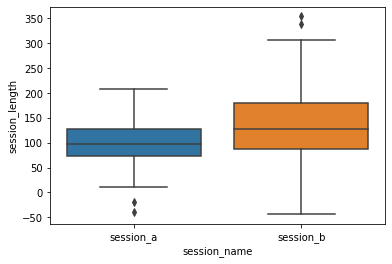

In [26]:
sns.boxplot(data=df, x='session_name', y='session_length')

We can see that `session_b` has a higher mean session time but a much wider spread. What are the mean of the two sessions:

In [27]:
df.groupby('session_name')['session_length'].mean()

session_name
session_a     98.738597
session_b    132.397559
Name: session_length, dtype: float64

In [28]:
132.397559 - 98.738597

33.658962

Users shown the `session_b` varient on average spend 33.66 seconds longer on the web page compared to the `session_a` varient but is this significant? One way to do this is to apply a permutation test by combining all the session times together, then repeatedly shuffle and divide them into groups sizes that represent the original group sizes.

In [31]:
# Code below shuffles the sessions times 1,000 times and splits the data into sizes equal to original group sizes (here 200 in each group)
# The mean between the two groups is taken and stored.

mean_diffs = []

all_session_values = df.session_length.values
for _ in range(1000):
    np.random.shuffle(all_session_values)
    prime_session_a = all_session_values[:200]
    prime_session_b = all_session_values[200:]
    mean_diffs.append(prime_session_b - prime_session_a)

Plot the `mean_diff` distribution with the actual mean difference plotted in orange

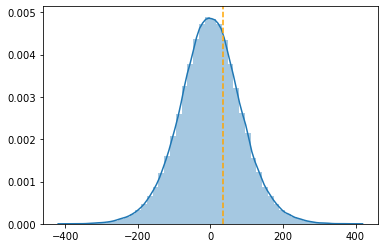

In [34]:
sns.distplot(mean_diffs)
plt.axvline(132.397559 - 98.738597, linestyle='--', color='orange', ymax=1.0)

The historgram shows the mean difference of random permutation often exceeds the observed difference in session times (orange line). This suggests that the observed difference on session time between the two varients is well within the range of chance variation, this likely **not** statistically significant.

## Exhaustive and Bootstrap Permutation Test

In addition to the preceding random shuffling procedure, also called a random
permutation test or a randomization test, there are two variants of the
permutation test:

- An exhaustive permutation test
- A bootstrap permutation test

In an exhaustive permutation test, instead of just randomly shuffling and
dividing the data, we actually figure out all the possible ways it could be divided.
This is practical only for relatively small sample sizes. With a large number of
repeated shufflings, the random permutation test results approximate those of the
exhaustive permutation test, and approach them in the limit. Exhaustive
permutation tests are also sometimes called exact tests, due to their statistical
property of guaranteeing that the null model will not test as “significant” more
than the alpha level of the test.

In a bootstrap permutation test, the draws outlined in steps 2 and 3 of the random
permutation test are made with replacement instead of without replacement. In
this way the resampling procedure models not just the random element in the
assignment of treatment to subject, but also the random element in the selection
of subjects from a population.

## Permutation Tests: The Bottom Line for Data Science

Permutation tests are useful heuristic procedures for exploring the role of
random variation. They are relatively easy to code, interpret and explain, and
they offer a useful detour around the formalism and "false determinism" of
formula-based statistics.

One virtue of resampling, in contrast to formula approaches, is that it comes
much closer to a "one size fits all" approach to inference. Data can be numeric or
binary. Sample sizes can be the same or different. Assumptions about normallydistributed
data are not needed.

### Key Takeaways

- In a permutation test, multiple samples are combined, then shuffled.
- The shuffled values are then divided into resamples, and the statistic of interest is calculated.
- This process is then repeated, and the resampled statistic is tabulated.
- Comparing the observed value of the statistic to the resampled distribution allows you to judge whether an observed difference between samples might occur by chance.

## Statistical Significance and P-Values

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce.

**P-value**: Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.
**Alpha**: The probability threshold of "unusualness" that chance results must surpass, for actual outcomes to be deemed statistically significant.
**Type 1 error**: Mistakenly concluding an effect is real (when it is due to chance).
**Type 2 error**: Mistakenly concluding an effect is due to chance (when it is real).

We can test whether the difference in
conversions between two prices A and B is within the range of chance variation,
using a resampling procedure. The difference between the two conversion rates is 5%.
By "chance variation," we mean the random
variation produced by a probability model that embodies the null hypothesis that
there is no difference between the rates. The
following permutation procedure asks "if the two prices share the same
conversion rate, could chance variation produce a difference as big as 5%?"

1. Create an urn with all sample results: this represents the supposed shared conversion rate of ones for all conversions and zeroes for all non-conversions
2. Shuffle and draw out a resample of equal size to varient A, and record how many 1s.
3. Record the number of 1s in the remaining varient (B).
4. Record the difference in proportion 1s.
5. Repeat steps 2–4.
6. How often was the difference >= the observed difference in the actual test?

Let's run through an example with the following data:

| Outcome       | Price A | Price B |
|---------------|---------|---------|
| Conversion    | 450     | 350     |
| No conversion | 53489   | 49278   |

In [6]:
print(f'Price A conversion rate: {450 / 53489 * 100:.2f}')
print(f'Price B conversion rate: {350 / 49278 * 100:.2f}')

Price A conversion rate: 0.84
Price A conversion rate: 0.71


Conversion rate difference:

In [7]:
0.84 - 0.71

0.13

A difference of 0.13 percentage points. Is this difference significant? Let's find out with a permutation test:

In [12]:
# Generate urn of ones and zeroes
ones = [1] * (450 + 350)
zeros = [0] * (53489 + 49278)

a_size = 450 + 53489
b_size = 350 + 49278

urn = np.hstack([ones, zeros])
urn, urn.shape

(array([1, 1, 1, ..., 0, 0, 0]), (103567,))

Run the permutation test as described above:

In [24]:
mean_diffs = []

for _ in range(1000):
    np.random.shuffle(urn)
    price_a_resample = urn[:a_size]
    price_b_resample = urn[a_size:]
    
    a_conversions = np.sum(price_a_resample == 1) / a_size * 100
    b_conversions = np.sum(price_b_resample == 1) / b_size * 100
    
    mean_diffs.append(a_conversions - b_conversions)

Plot the histogram of conversion differences with actual (observed) difference plotted with an orange line:

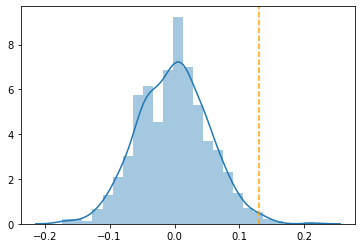

In [25]:
sns.distplot(mean_diffs)
plt.axvline(0.13, linestyle='--', color='orange', ymax=1.0)

The observed difference is well outside the range of change variation, but is it significant? This will be quantified in the next section.

### P-Value

Simply looking at the graph is not a very precise way to measure statistical
significance, so of more interest is the _p-value_. This is the frequency with which
the chance model produces a result more extreme than the observed result.
We can estimate a p-value from our permutation test by taking the proportion of
times that the permutation test produces a difference equal to or greater than the
observed difference:

In [27]:
# p-value
np.mean(np.array(mean_diffs) > 0.13)

0.008

A p-value of 0.008 meaning that we would expect to achieve a result as
extreme as this, or more extreme, by random chance over 0.8% of the time.

We can also determine if the difference is signficiant by calculating the 95th percentile.
By taking the 95 percentile we obtain a value at which the observed difference becomes significant.
If the observed difference 0.13 is greater than the value below then it is significant.

In [32]:
np.percentile(mean_diffs, 95)

0.08647040370911874

0.13 is greater than 0.086 meaning the result is significantly different.

### Alpha

Statisticians frown on the practice of leaving it to the researcher’s discretion to
determine whether a result is “too unusual” to happen by chance. Rather, a
threshold is specified in advance, as in "more extreme than 5% of the chance
(null hypothesis) results"; this threshold is known as alpha. Typical alpha levels
are 5% and 1%. Any chosen level is an arbitrary decision—there is nothing
about the process that will guarantee correct decisions x% of the time. This is
because the probability question being answered is not "what is the probability
that this happened by chance?" but rather **“given a chance model, what is the
probability of a result this extreme?”** We then deduce backward about the
appropriateness of the chance model, but that judgment does not carry a
probability. This point has been the subject of much confusion.

#### Value of the P-Value

The real problem is that people want more meaning from the p-value than it
contains. Here’s what we would like the p-value to convey:

_The probability that the result is due to chance._

We hope for a low value, so we can conclude that we’ve proved something. This
is how many journal editors were interpreting the p-value. But here’s what the pvalue
actually represents:

_The probability that, given a chance model, results as extreme as the observed results could occur._

The difference is subtle, but real. A significant p-value does not carry you quite
as far along the road to "proof" as it seems to promise. The logical foundation
for the conclusion “statistically significant” is somewhat weaker when the real
meaning of the p-value is understood.

The ASA statement stressed six principles for researchers and journal editors:

1. P-values can indicate how incompatible the data are with a specified statistical model.
2. P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

### Type 1 and Type 2 Errors

- Type 1 error, in which you mistakenly conclude an effect is real, when it is really just due to chance
- Type 2 error, in which you mistakenly conclude that an effect is not real (i.e., due to chance), when it really is real

The basic function of significance tests (also called hypothesis tests) is to protect
against being fooled by random chance; thus they are typically structured to
minimize Type 1 errors.

### Data Science and P-Values
For a data scientist, a p-value is a useful metric in situations where
you want to know whether a model result that appears interesting and useful is
within the range of normal chance variability. As a decision tool in an
experiment, a p-value should not be considered controlling, but merely another
point of information bearing on a decision. For example, p-values are sometimes
used as intermediate inputs in some statistical or machine learning models—a
feature night be included in or excluded from a model depending on its p-value.

### Key Takeaways

- Significance tests are used to determine whether an observed effect is within the range of chance variation for a null hypothesis model.
- The p-value is the probability that results as extreme as the observed results might occur, given a null hypothesis model.
- The alpha value is the threshold of “unusualness” in a null hypothesis chance model.
- Significance testing has been much more relevant for formal reporting of research than for data science (but has been fading recently, even for the former).

## t-Tests

**Test statistic**: A metric for the difference or effect of interest.
**t-statistic**: A standardized version of the test statistic.
**t-distribution**: A reference distribution (in this case derived from the null hypothesis), to which the observed t-statistic can be compared.

All significance tests require that you specify a test statistic to measure the effect
you are interested in, and help you determine whether that observed effect lies
within the range of normal chance variation. In a resampling test (e.g. Permutation Test), the scale of the data does not
matter. You create the reference (null hypothesis) distribution from the data
itself, and use the test statistic as is.

Back in the day we didn't have the computation power to perform shuffle thousands of times
to do the permutation test. A good approximation to the permutation (shuffled)
distribution was the t-test, based on Gossett’s t-distribution. It is used for the
very common two-sample comparison—A/B test—in which the data is numeric.
But in order for the t-distribution to be used without regard to scale, a
standardized form of the test statistic must be used.

Many python tools can perform t-tests e.g. scipy

## Multiple Testing

As we’ve mentioned previously, there is a saying in statistics: **"torture the data
long enough, and it will confess."** This means that if you look at the data through
enough different perspectives, and ask enough questions, you can almost
invariably find a statistically significant effect.

- **Type 1 error**: Mistakenly concluding that an effect is statistically significant.
- **False discovery rate**: Across multiple tests, the rate of making a Type 1 error.
- **Adjustment of p-values**: Accounting for doing multiple tests on the same data.
- **Overfitting**: Fitting the noise.

For example, if you have 20 predictor variables and one outcome variable, all
randomly generated, the odds are pretty good that at least one predictor will
(falsely) turn out to be statistically significant if you do a series of 20
significance tests at the alpha = 0.05 level. This is a Type 1 error.
The probability that
one will correctly test nonsignificant is 0.95, so the probability that all 20 will
correctly test nonsignificant is: $0.95 \times 0.95 \times 0.95 ... $ or $0.95^{20}$

In [2]:
0.95**20

0.3584859224085419

The probability that at least one predictor will (falsely) test significant is the flip side
of this probability, or 1 – (probability that all will be nonsignificant):

In [3]:
1 - (0.95**20)

0.6415140775914581

This issue is related to the problem of overfitting in data mining, or “fitting the
model to the noise.” The more variables you add, or the more models you run,
the greater the probability that something will emerge as “significant” just by
chance.

In supervised learning tasks, a holdout set where models are assessed on data
that the model has not seen before mitigates this risk. In statistical and machine
learning tasks not involving a labeled holdout set, the risk of reaching
conclusions based on statistical noise persists.

In statistics, there are some procedures intended to deal with this problem in very
specific circumstances. For example, if you are comparing results across
multiple treatment groups you might ask multiple questions. So, for treatments
A–C, you might ask:

- Is A different from B?
- Is B different from C?
- Is A different from C?

With each question, you are increasing the chance of being fooled by chance.

However, the problem of multiple comparisons goes beyond these highly
structured cases and is related to the phenomenon of repeated data “dredging”
that gives rise to the saying about torturing the data. Put another way, given
sufficiently complex data, if you haven’t found something interesting, you
simply haven’t looked long and hard enough. This gives rise to lots of opportunities to find something
interesting in the data, including multiplicity issues such as:
- Checking for multiple pairwise differences across groups
- Looking at multiple subgroup results ("we found no significant treatment effect overall, but we did find an effect for unmarried women younger than 30")
- Trying lots of statistical models
- Including lots of variables in models
- Asking a number of different questions (i.e., different possible outcomes)

For a variety of reasons, including especially this general issue of “multiplicity,”
more research does not necessarily mean better research. Studies have found that
nearly two-thirds of experiments could not be successfully replicated.

In any case, the adjustment procedures for highly defined and structured
statistical tests are too specific and inflexible to be of general use to data
scientists. The bottom line for data scientists on multiplicity is:

- For predictive modeling, the risk of getting an illusory model whose apparent efficacy is largely a product of random chance is mitigated by crossvalidation (see "Cross-Validation"), and use of a holdout sample.
- For other procedures without a labeled holdout set to check the model, you must rely on:
    - Awareness that the more you query and manipulate the data, the greater the role that chance might play; and
    - Resampling and simulation heuristics to provide random chance benchmarks against which observed results can be compared.
    
### Key Takeaways

- Multiplicity in a research study or data mining project (multiple comparisons, many variables, many models, etc.) increases the risk of concluding that something is significant just by chance.
- For situations involving multiple statistical comparisons (i.e., multiple tests of significance) there are statistical adjustment procedures.
- In a data mining situation, use of a holdout sample with labeled outcome variables can help avoid misleading results.